
--- Processing folder: ./Dataset/Open/Edited_plant_split/Salvia/train ---


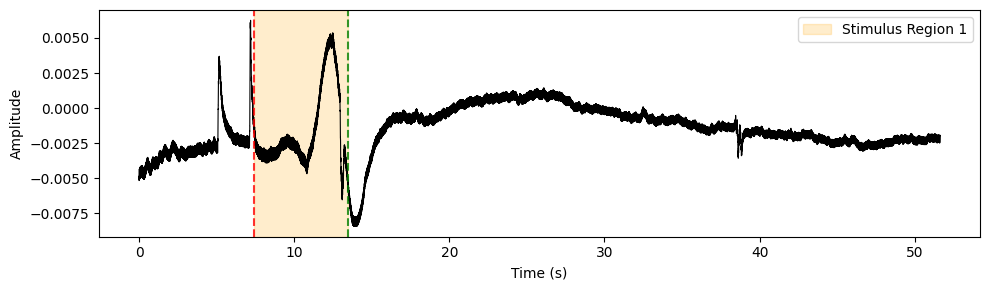

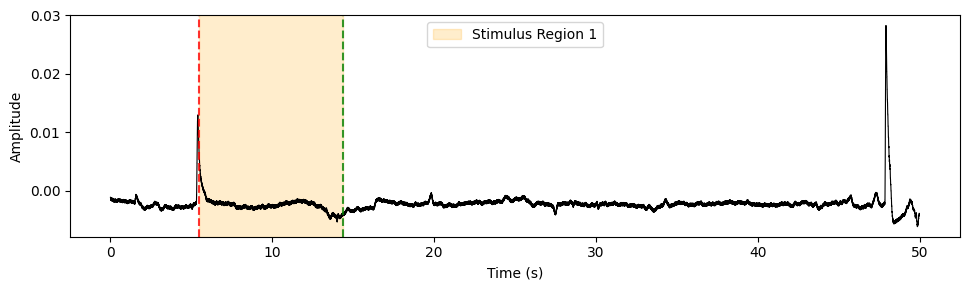

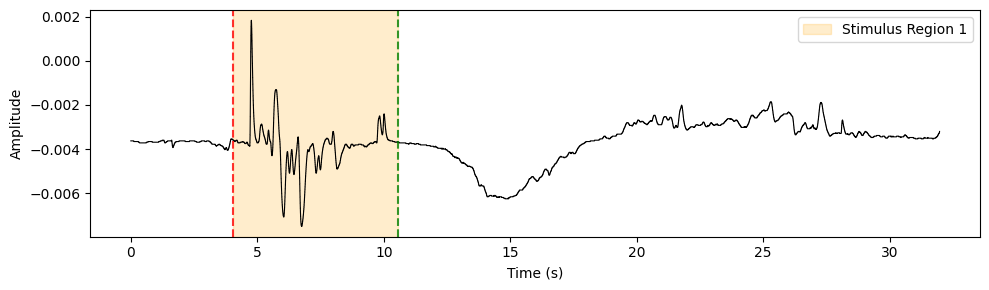

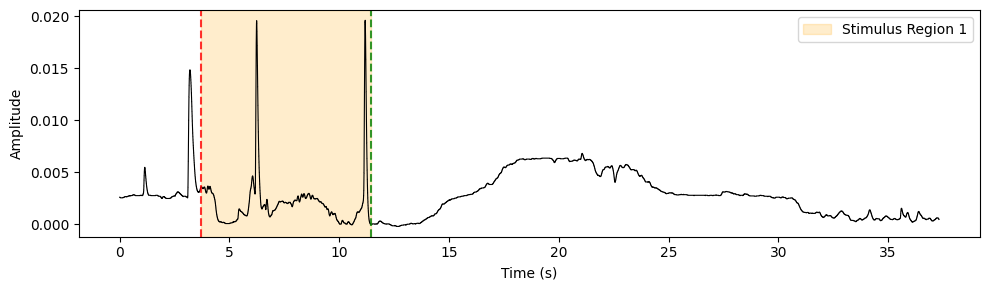

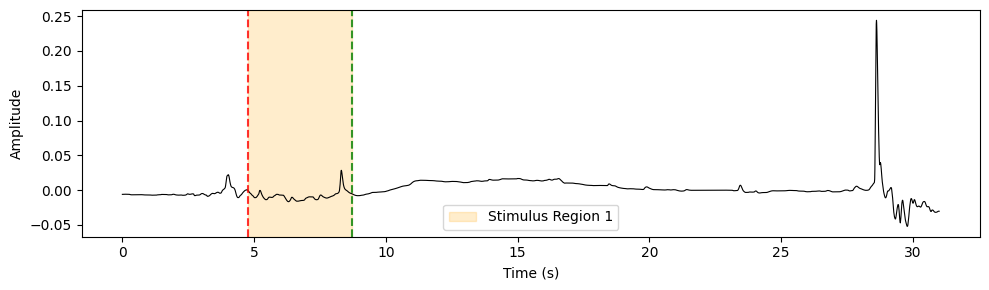

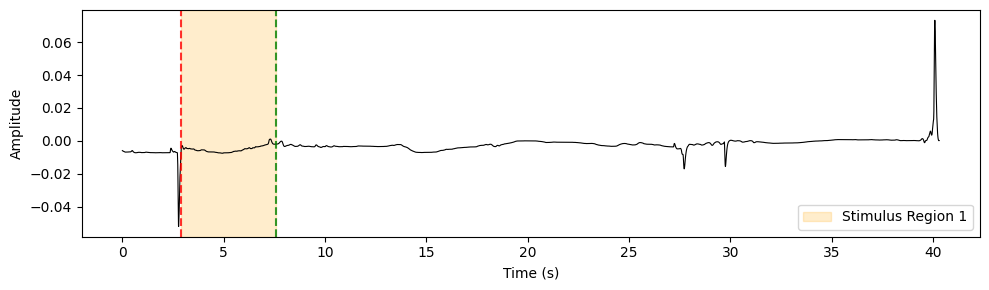

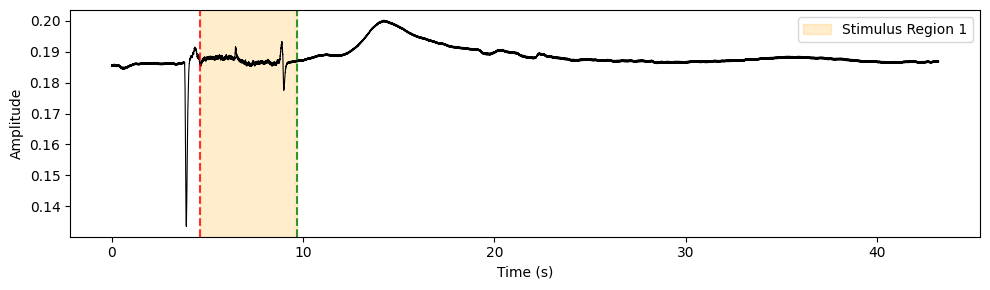

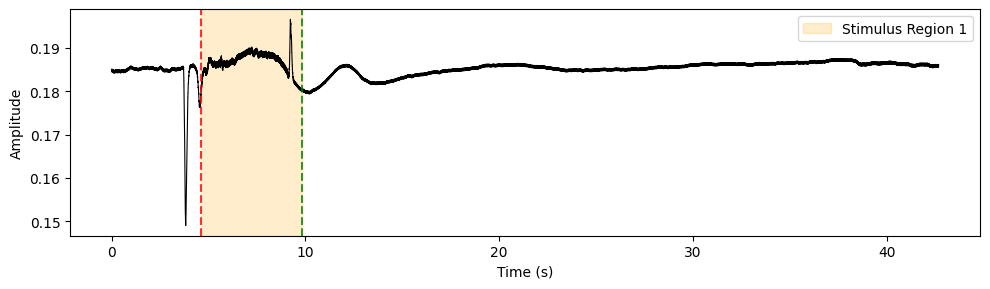

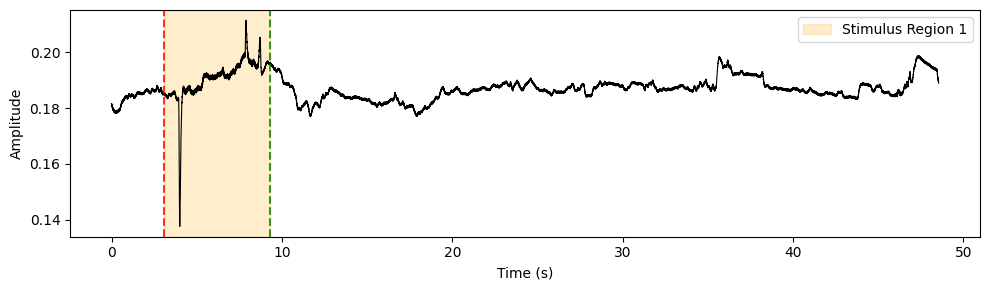

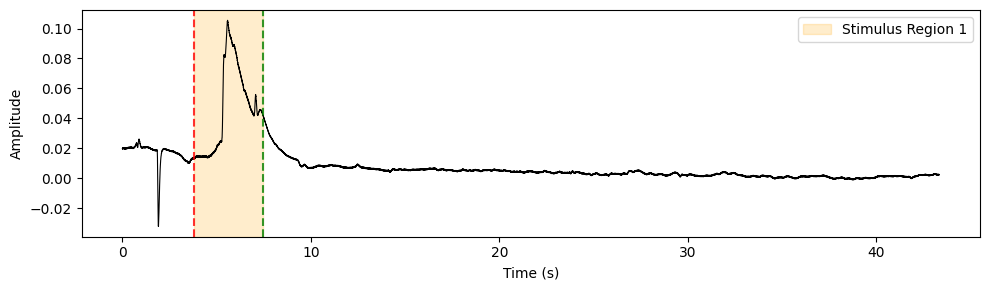

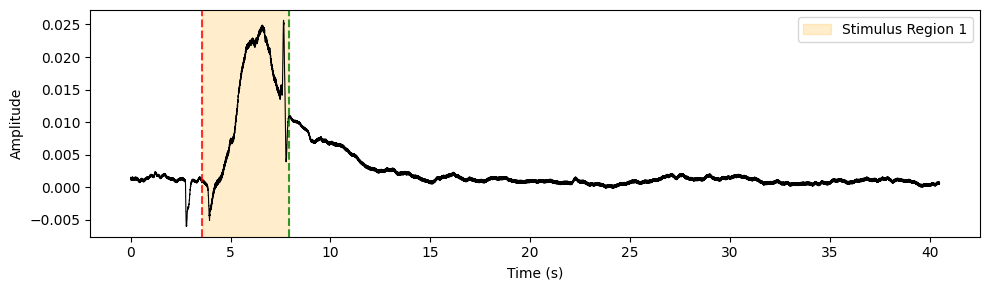

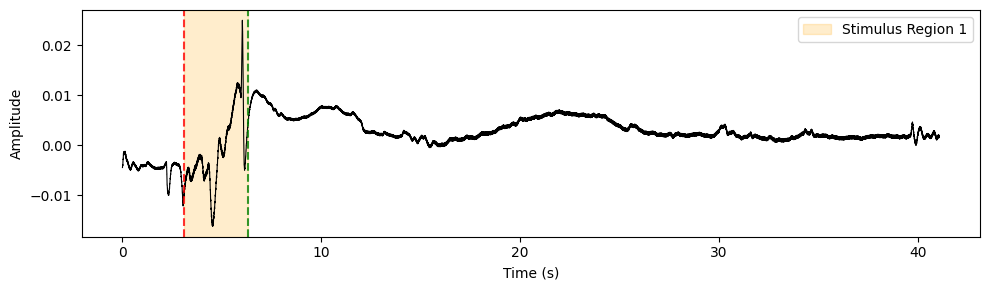

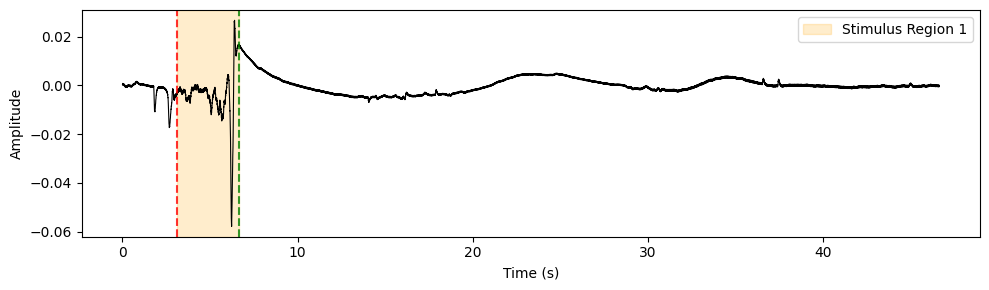

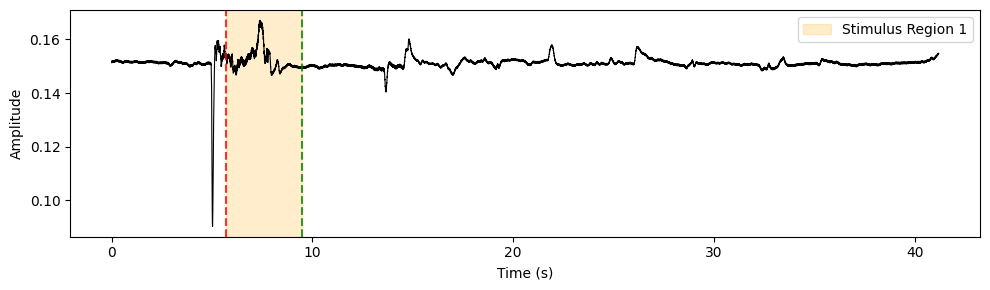

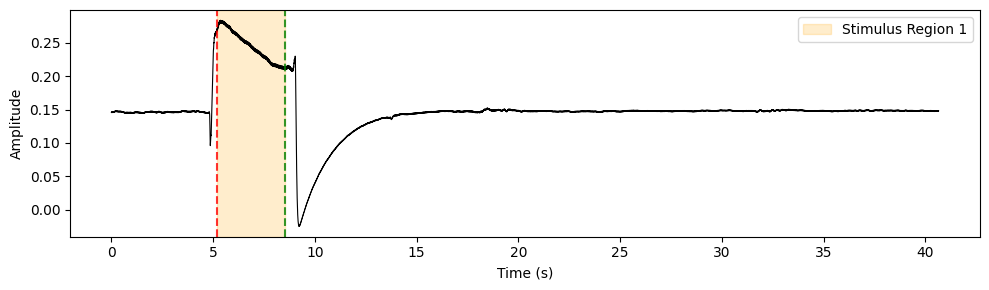

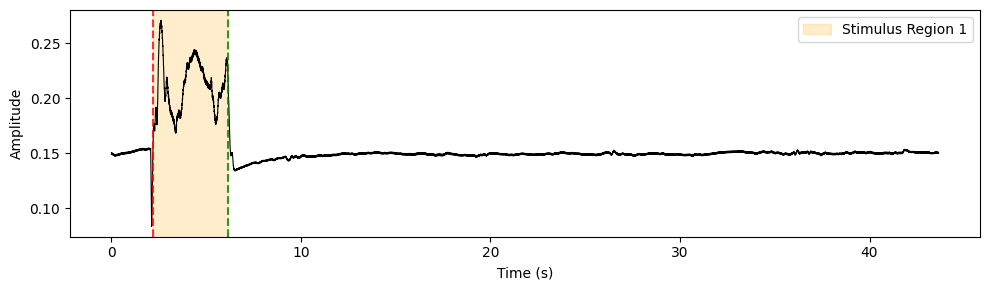

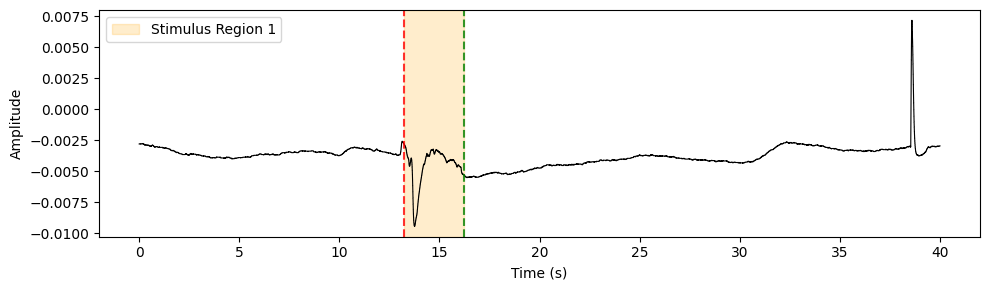

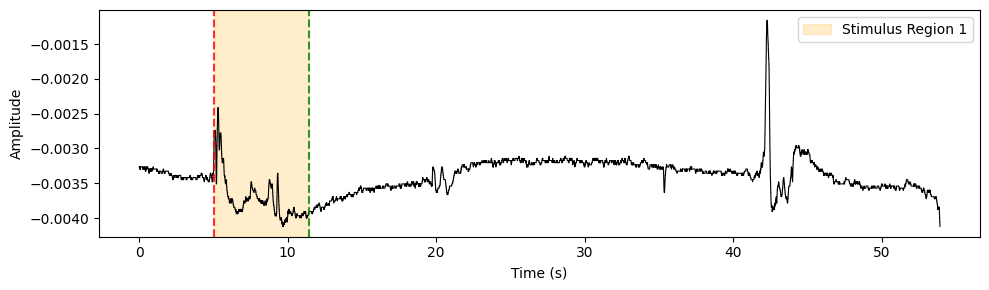

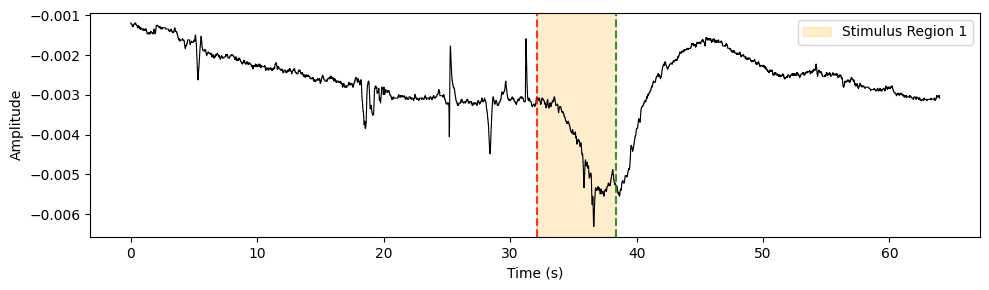

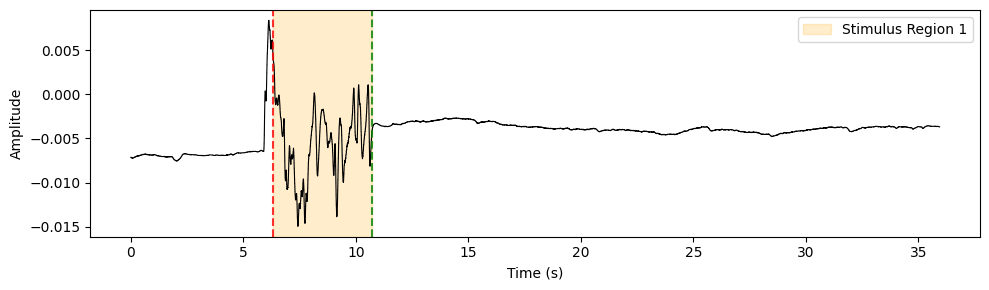

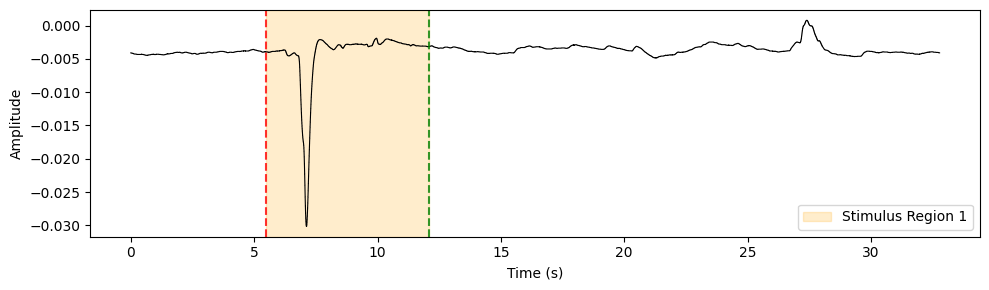

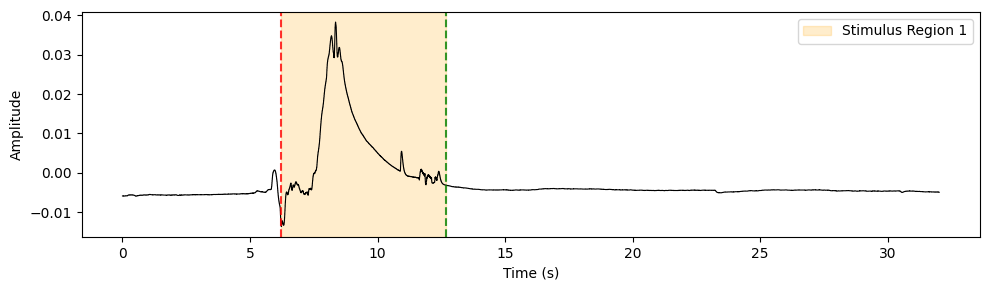

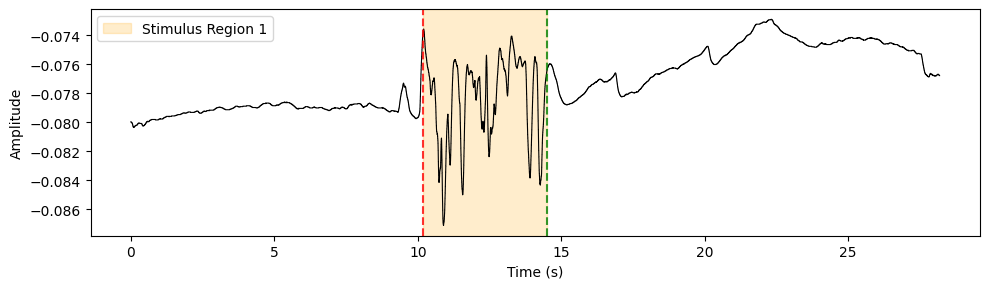

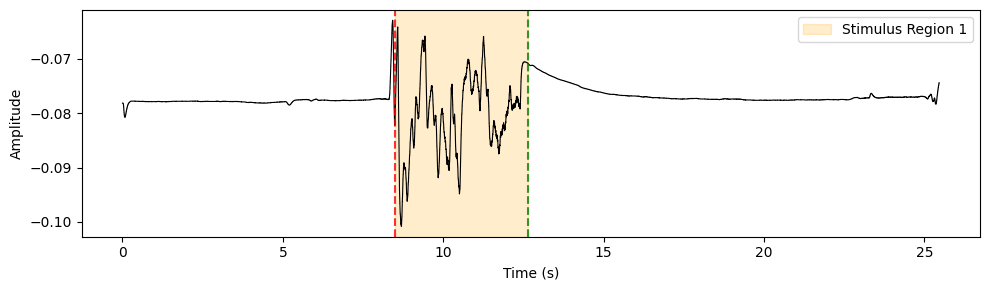


--- Processing folder: ./Dataset/Open/Edited_plant_split/Salvia/test ---


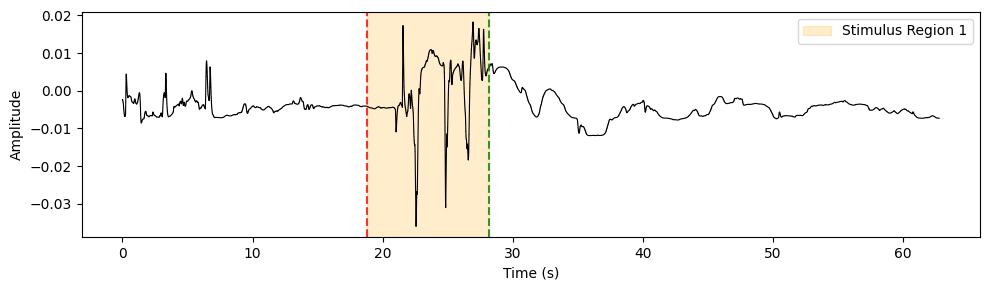

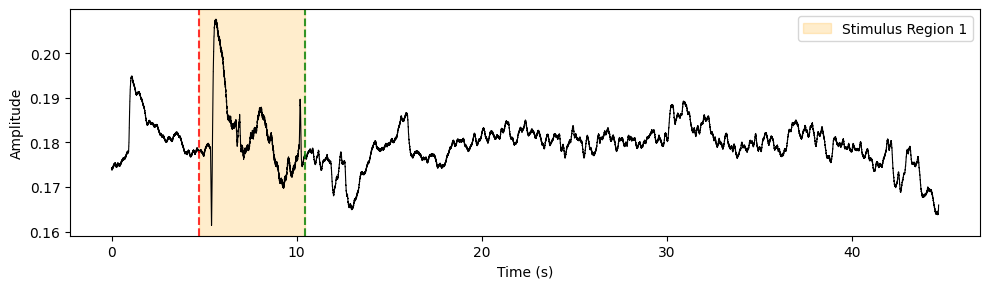

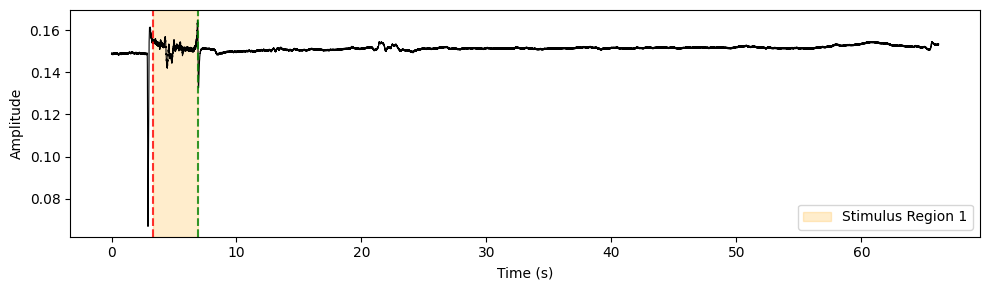

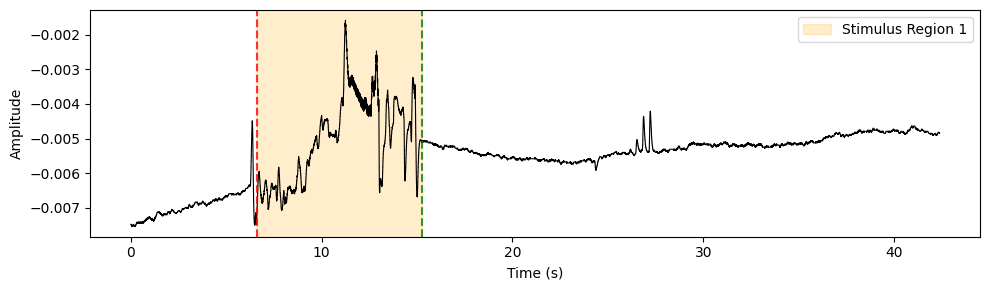

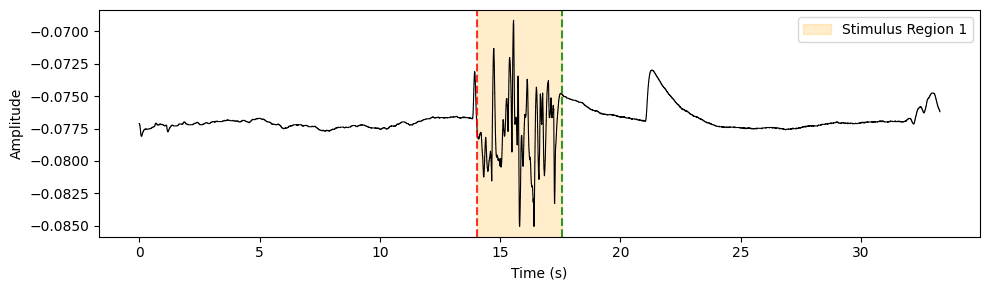

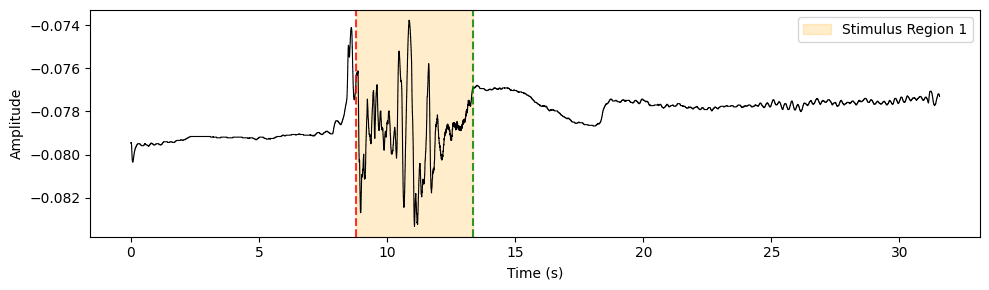


All files visualized.


In [11]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# --- MODIFICATION ---
# Define a list of all folders you want to process
folders_to_process = [
    "./Dataset/Open/Edited_plant_split/Salvia/train",
    "./Dataset/Open/Edited_plant_split/Salvia/test"
]

# Outer loop to iterate through each folder (train and test)
for folder_path in folders_to_process:
    print(f"\n--- Processing folder: {folder_path} ---")
    
    if not os.path.exists(folder_path):
        print(f"Directory not found, skipping: {folder_path}")
        continue
    
    split_name = os.path.basename(folder_path) # Gets 'train' or 'test'
    wav_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.wav')])
    
    if not wav_files:
        print("No .wav files found in this folder.")
        continue

    for wav_file in wav_files:
        wav_path = os.path.join(folder_path, wav_file)
        marker_file = wav_file.replace('.wav', '-events.txt')
        marker_path = os.path.join(folder_path, marker_file)
        
        # === Read WAV file ===
        y, sr = librosa.load(wav_path, sr=None)
        t = np.linspace(0, len(y)/sr, num=len(y))
        
        # === Parse all marker (1,2) pairs ===
        marker_pairs = []
        markers = []
        if os.path.exists(marker_path):
            with open(marker_path, "r") as f:
                for line in f:
                    line = line.strip()
                    if line == "" or line.startswith("#") or "Time" in line:
                        continue
                    try:
                        marker_id, marker_time = line.split(",")
                        marker_id = int(marker_id.strip())
                        marker_time = float(marker_time.strip())
                        markers.append((marker_id, marker_time))
                    except Exception:
                        continue
        
        # Pair up each (1, time) with the next (2, time)
        temp_start = None
        for m_id, m_time in markers:
            if m_id == 1:
                temp_start = m_time
            elif m_id == 2 and temp_start is not None:
                marker_pairs.append((temp_start, m_time))
                temp_start = None

        if not marker_pairs:
            print(f"Skipping {wav_file}: No complete (1,2) marker pairs found")
            continue

        # === Plot ===
        plt.figure(figsize=(10, 3))
        plt.plot(t, y, color="black", linewidth=0.8)
        for idx, (start, end) in enumerate(marker_pairs):
            plt.axvline(start, color="red", linestyle="--", alpha=0.8)
            plt.axvline(end, color="green", linestyle="--", alpha=0.8)
            plt.axvspan(start, end, color="orange", alpha=0.2, label=f"Stimulus Region {idx+1}" if idx == 0 else None)
        
        # --- MODIFICATION ---
        # Added split_name to the title for clarity
        
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.tight_layout()
        plt.show()

print("\nAll files visualized.")